# Question 1
Name: Pouya Lahabi

Student Code: 400109843

In [1]:
##imports
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from typing import Callable

from scipy.stats import norm
from scipy.fft import fft, ifft

## A. implementing a system adding noise to input

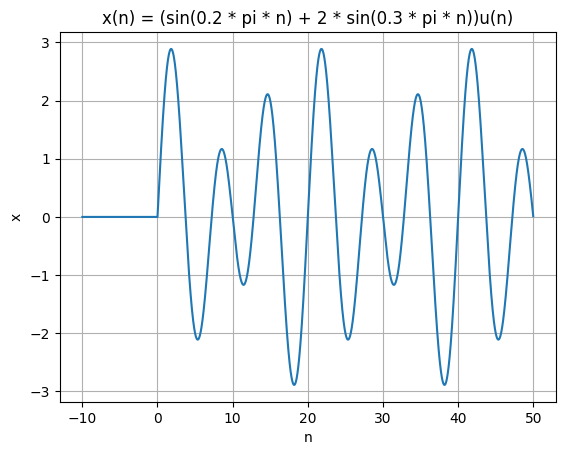

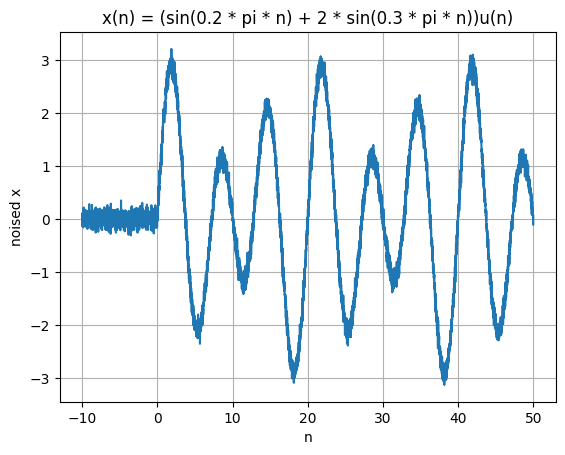

In [32]:
def system(x, n, sigma=0.1):
    if hasattr(n, "__len__"):
        return x(n) + norm(loc = 0, scale=sigma).rvs(len(n))
    return x(n) + norm(loc = 0, scale=sigma).rvs()

def x(n):
    if hasattr(n, "__len__"):
        return np.array([0 if i < 0 else (np.sin(0.2 * np.pi * i) + 2 * np.sin(0.3 * np.pi * i)) for i in n])
    return 0 if n < 0 else (np.sin(0.2 * np.pi * n) + 2 * np.sin(0.3 * np.pi * n))

n = np.arange(-10, 50, 0.01)

plt.title('x(n) = (sin(0.2 * pi * n) + 2 * sin(0.3 * pi * n))u(n)')
plt.plot(n, x(n), '-')
plt.ylabel('x')
plt.xlabel('n')
plt.grid(True)

plt.show()

plt.title('x(n) = (sin(0.2 * pi * n) + 2 * sin(0.3 * pi * n))u(n)')
plt.plot(n, system(x, n), '-')
plt.ylabel('noised x')
plt.xlabel('n')
plt.grid(True)

plt.show()

## B. denoising system

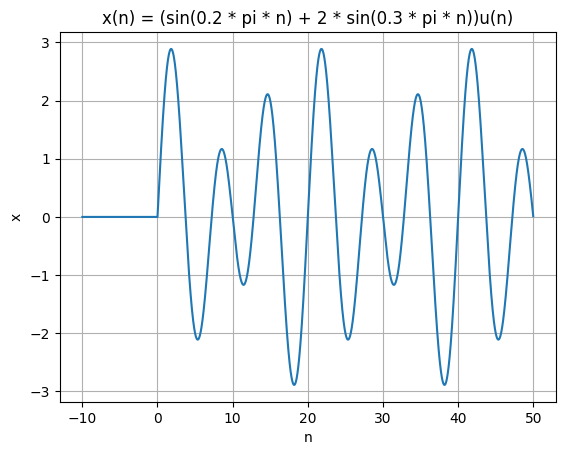

In [36]:
## denoising a system
def denoise_system(x, n, sigma=0.1):
    if hasattr(n, "__len__"):
        return x(n) - norm(loc = 0, scale=sigma).rvs(len(n))
    return x(n) - norm(loc = 0, scale=sigma).rvs()

plt.title('x(n) = (sin(0.2 * pi * n) + 2 * sin(0.3 * pi * n))u(n)')
plt.plot(n, x(n), '-')
plt.ylabel('x')
plt.xlabel('n')
plt.grid(True)

plt.show()

plt.title('x(n) = (sin(0.2 * pi * n) + 2 * sin(0.3 * pi * n))u(n)')
plt.plot(n, denoise_system(x, n), '-')
plt.ylabel('denoised x')
plt.xlabel('n')
plt.grid(True)

plt.show()

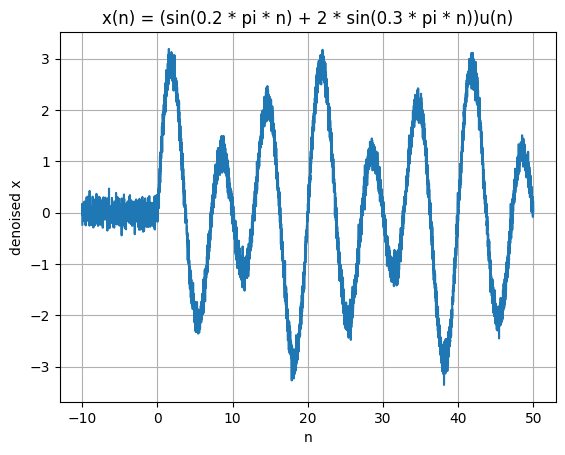

In [40]:
## denoising a noised signal
plt.title('x(n) = (sin(0.2 * pi * n) + 2 * sin(0.3 * pi * n))u(n)')
noised_signal = lambda n: system(x, n)
plt.plot(n, denoise_system(noised_signal, n), '-')
plt.ylabel('denoised x')
plt.xlabel('n')
plt.grid(True)

plt.show()

## C. frequency response of system